In [2]:
!pip3 install matplotlib
!pip3 install seaborn
#Data Collection 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 21.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 15.0 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.6 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
glob.glob(r'./individual_stocks_5yr/*.csv')

['./individual_stocks_5yr/XRX_data.csv',
 './individual_stocks_5yr/GS_data.csv',
 './individual_stocks_5yr/SPGI_data.csv',
 './individual_stocks_5yr/MTB_data.csv',
 './individual_stocks_5yr/V_data.csv',
 './individual_stocks_5yr/CTAS_data.csv',
 './individual_stocks_5yr/ESRX_data.csv',
 './individual_stocks_5yr/APH_data.csv',
 './individual_stocks_5yr/BBT_data.csv',
 './individual_stocks_5yr/RHI_data.csv',
 './individual_stocks_5yr/GGP_data.csv',
 './individual_stocks_5yr/HCA_data.csv',
 './individual_stocks_5yr/HD_data.csv',
 './individual_stocks_5yr/PEP_data.csv',
 './individual_stocks_5yr/INTC_data.csv',
 './individual_stocks_5yr/MAC_data.csv',
 './individual_stocks_5yr/CLX_data.csv',
 './individual_stocks_5yr/UNP_data.csv',
 './individual_stocks_5yr/WAT_data.csv',
 './individual_stocks_5yr/EMN_data.csv',
 './individual_stocks_5yr/ADSK_data.csv',
 './individual_stocks_5yr/ALK_data.csv',
 './individual_stocks_5yr/VZ_data.csv',
 './individual_stocks_5yr/AFL_data.csv',
 './individual_s

In [4]:
len(glob.glob(r'./individual_stocks_5yr/*.csv'))

505

In [7]:
company_list = [
    r'./individual_stocks_5yr/AAPL_data.csv',
    r'./individual_stocks_5yr/AMZN_data.csv',
    r'./individual_stocks_5yr/GOOG_data.csv',
    r'./individual_stocks_5yr/MSFT_data.csv'
]

In [12]:
all_df = pd.DataFrame()

for i in company_list:
    current_df = pd.read_csv(i)
    all_df = current_df._append(all_df, ignore_index = True)

In [13]:
all_df.shape

(4752, 7)

In [14]:
all_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [15]:
all_df['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [20]:
# Analyze Change in price of the stock
all_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [25]:
all_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [24]:
all_df['date'] = pd.to_datetime(all_df['date'])

In [26]:
tech_list = all_df['Name'].unique()
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

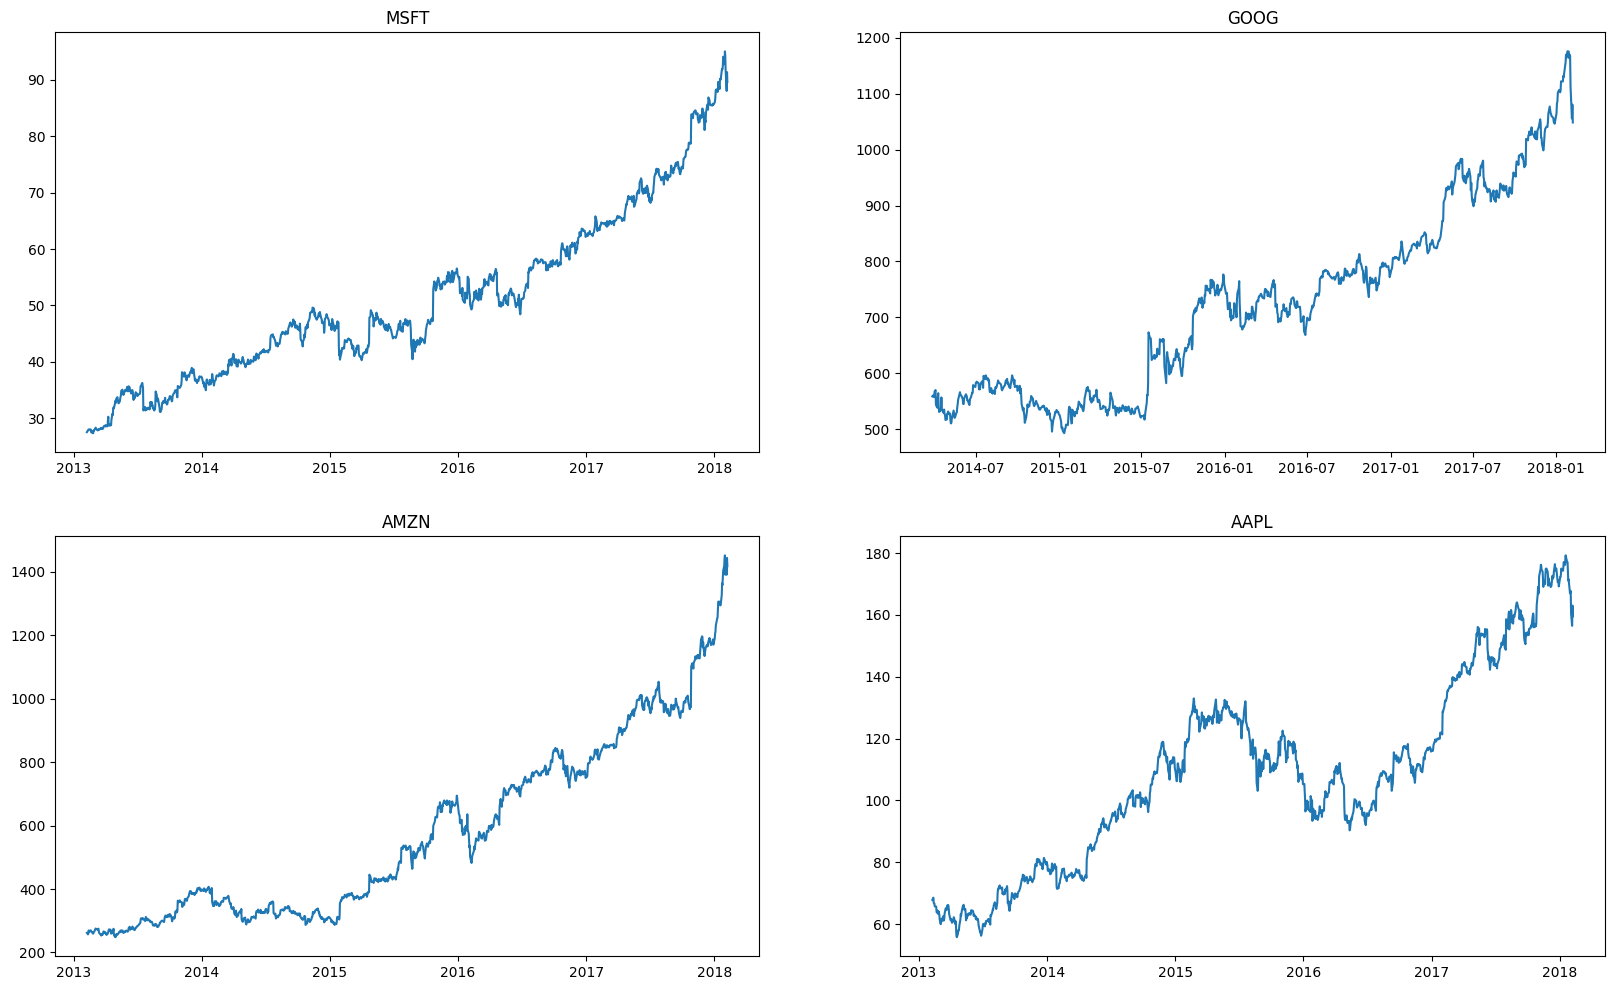

In [34]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = all_df['Name']==company
    df = all_df[filter1]

    plt.plot(df['date'],df['close'])
    plt.title(company)

In [35]:
all_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [40]:
all_df['close'].rolling(window=10).mean().head(15)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
Name: close, dtype: float64

In [46]:
new_data = all_df.copy()
ma_day = [10,20,50]

for i in ma_day:
    new_data['close_'+str(i)] = new_data['close'].rolling(i).mean()



In [47]:
new_data.head(20)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT,NaN,NaN,NaN
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT,NaN,NaN,NaN
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT,NaN,NaN,NaN
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT,NaN,NaN,NaN
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT,NaN,NaN,NaN
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT,NaN,NaN,NaN
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT,NaN,NaN,NaN
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT,NaN,NaN,NaN
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT,27.8535,NaN,NaN


In [ ]:
new_data.set_index('date', inplace=True)


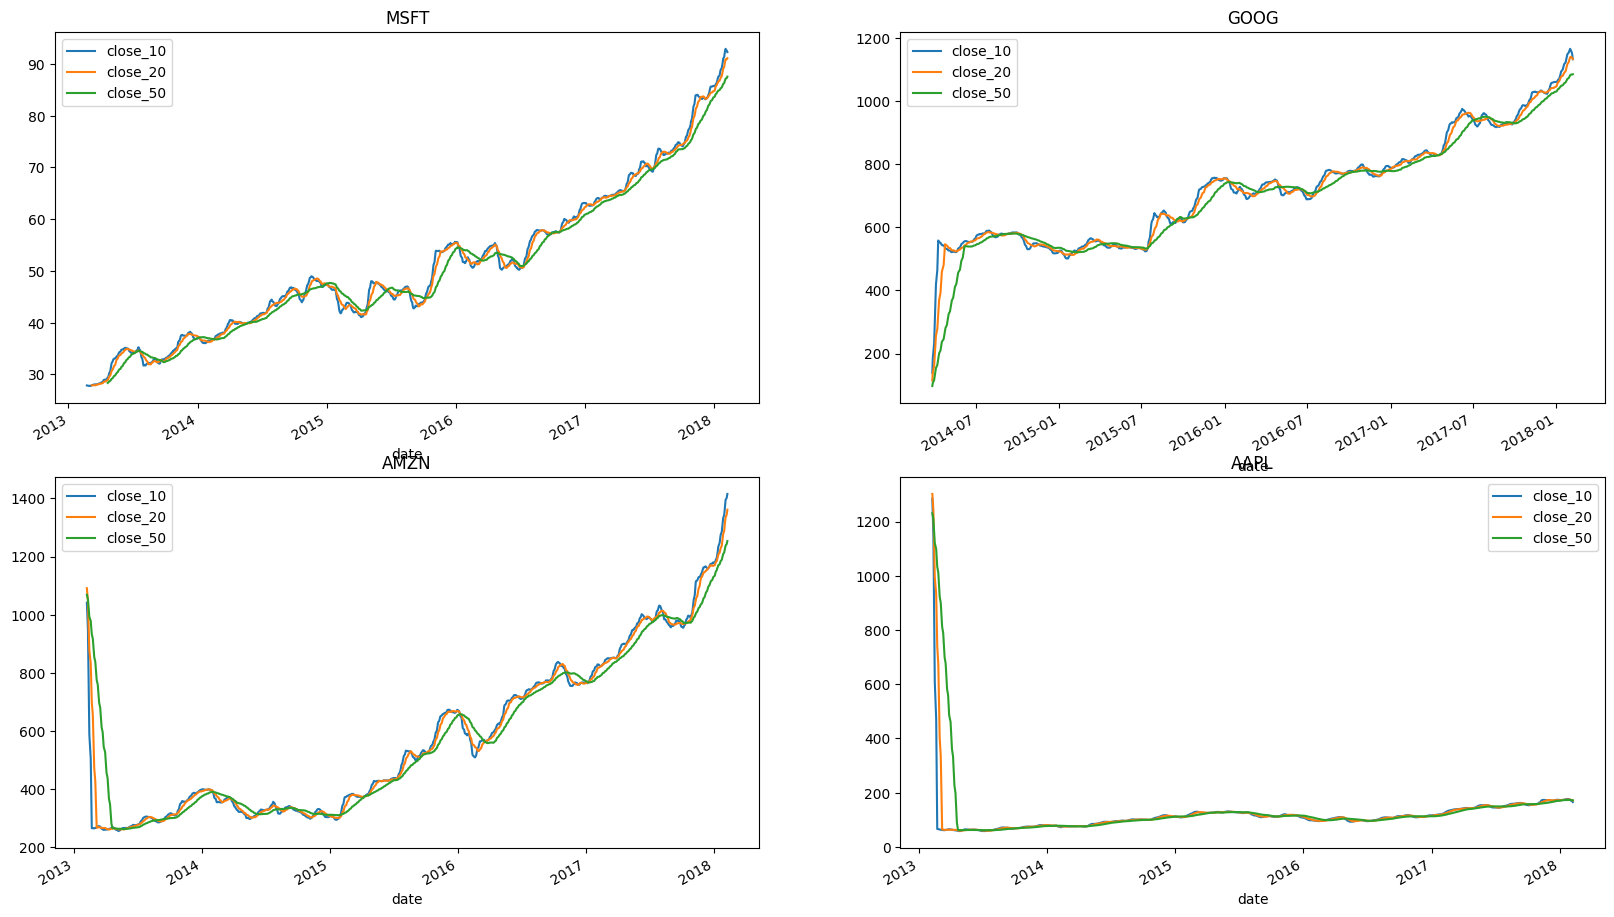

In [54]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax = plt.gca())
    plt.title(company)
    

In [53]:
new_data.head()

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,NaN,NaN,NaN


In [55]:
# OBSERVE CLosing Price change in Apple
apple = pd.read_csv(company_list[0])

In [58]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [62]:
apple['Daily return'] = apple['close'].pct_change() * 100

In [63]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [64]:
!pip install plotly
import plotly.express as px

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


In [67]:
px.line(apple, x='date', y='Daily return')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'date=%{x}<br>Daily return=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array(['2013-02-08', '2013-02-11', '2013-02-12', ..., '2018-02-05',
                          '2018-02-06', '2018-02-07'], dtype=object),
              'xaxis': 'x',
              'y': array([        nan,  1.04223467, -2.50665827, ..., -2.49844237,  4.17918078,
                          -2.1407103 ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Daily return'}}}
})

In [68]:
#performing Resampling Analysis
apple.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
Name             object
Daily return    float64
dtype: object

In [69]:
apple['date'] = pd.to_datetime(apple['date'])

In [70]:
apple.set_index('date', inplace = True)

In [71]:
apple.head()

,open,high,low,close,volume,Name,Daily return
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [72]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

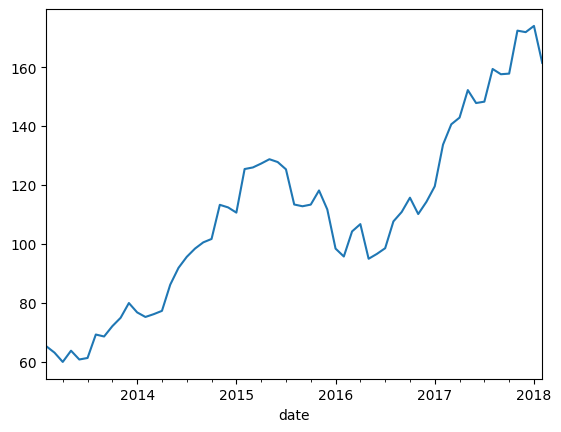

In [73]:
apple['close'].resample('M').mean().plot()

In [75]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

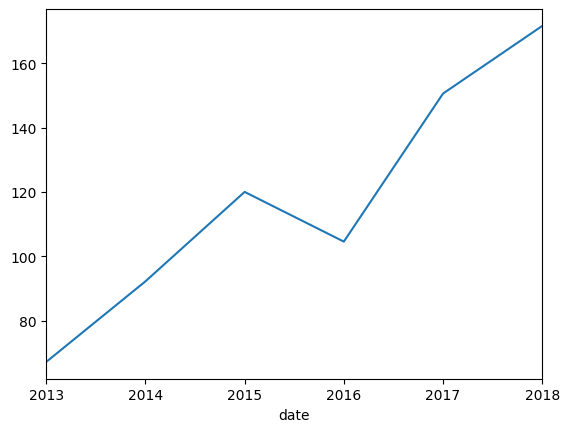

In [74]:
apple['close'].resample('Y').mean().plot()

In [76]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

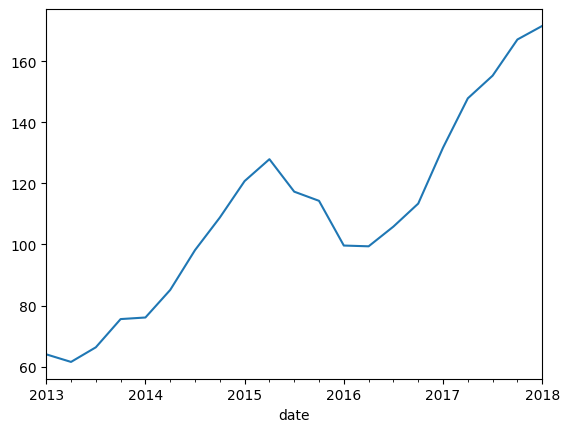

In [78]:
apple['close'].resample('Q').mean().plot()

In [82]:
# Multi- Variate Analysis to Understand co-relation
# COREALATION ANALYSIS
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])
   


In [83]:
closing_price = pd.DataFrame()
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft'] = msft['close']

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



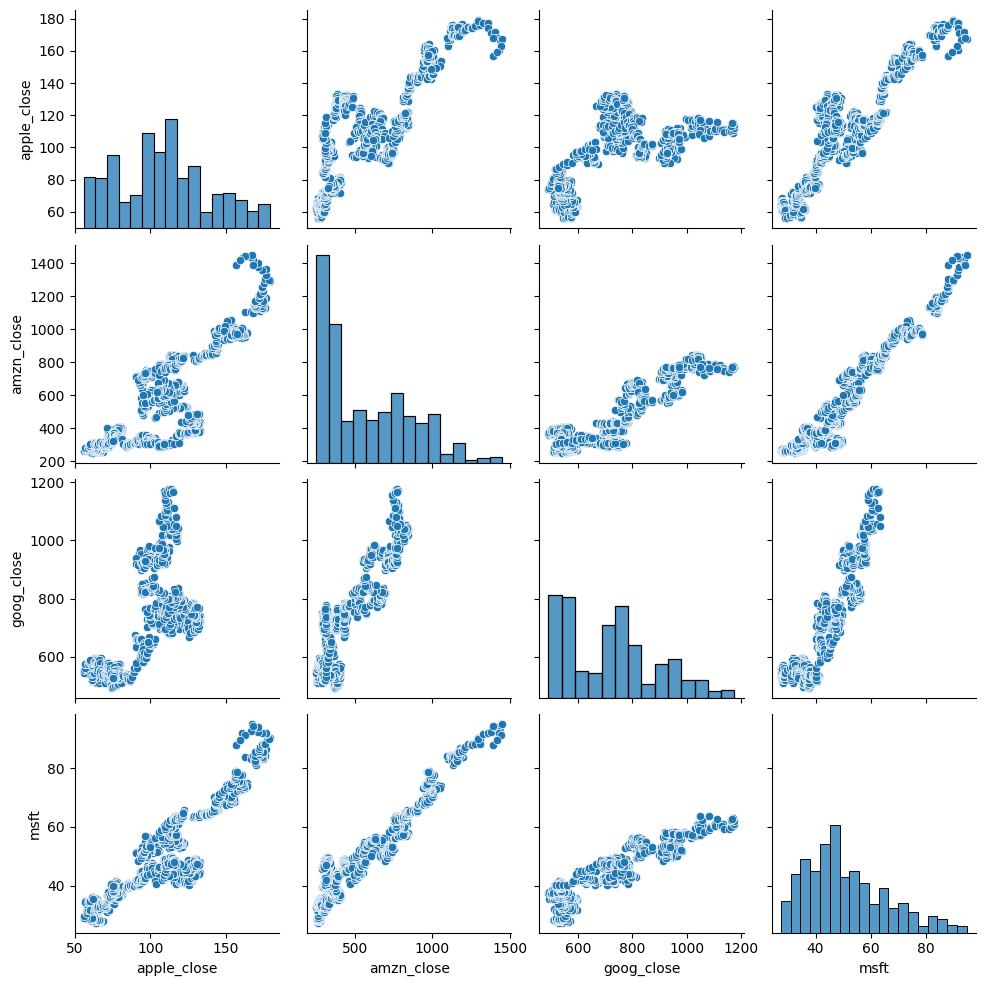

In [84]:
sns.pairplot(closing_price)

In [85]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft,0.899689,0.955977,0.907011,1.000000


<Axes: >

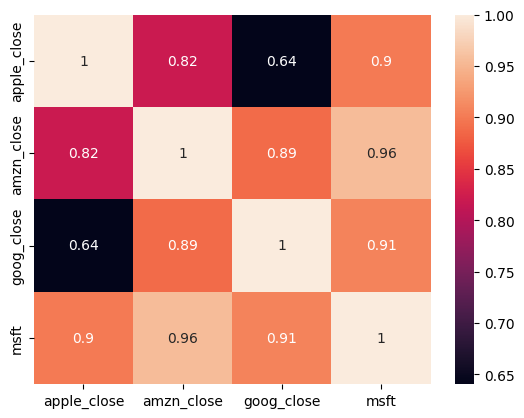

In [86]:
sns.heatmap(closing_price.corr(),annot=True)

In [88]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [ ]:
((closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) ) * 100

In [89]:
for col in closing_price.columns:
    closing_price[col+'_pct change'] = ((closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) ) * 100

In [90]:
closing_price

,apple_close,amzn_close,goog_close,msft,apple_close_pct change,amzn_close_pct change,goog_close_pct change,msft_pct change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [92]:
closing_price.columns
clsing_g = closing_price[['amzn_close_pct change','goog_close_pct change', 'msft_pct change']]

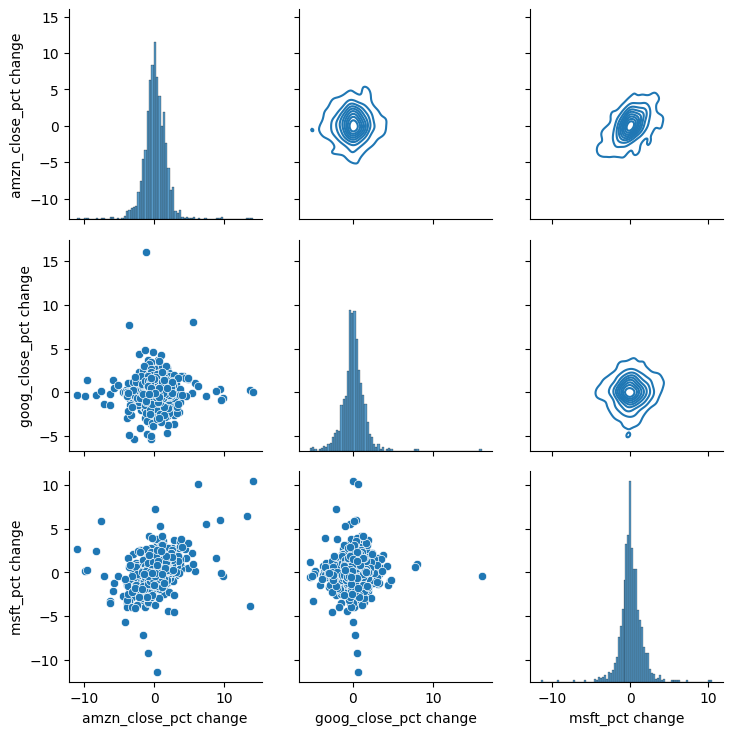

In [93]:
g = sns.PairGrid(data = clsing_g)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [95]:
clsing_g.corr()

,amzn_close_pct change,goog_close_pct change,msft_pct change
amzn_close_pct change,1.000000,0.027698,0.402678
goog_close_pct change,0.027698,1.000000,0.038939
msft_pct change,0.402678,0.038939,1.000000


<Axes: >

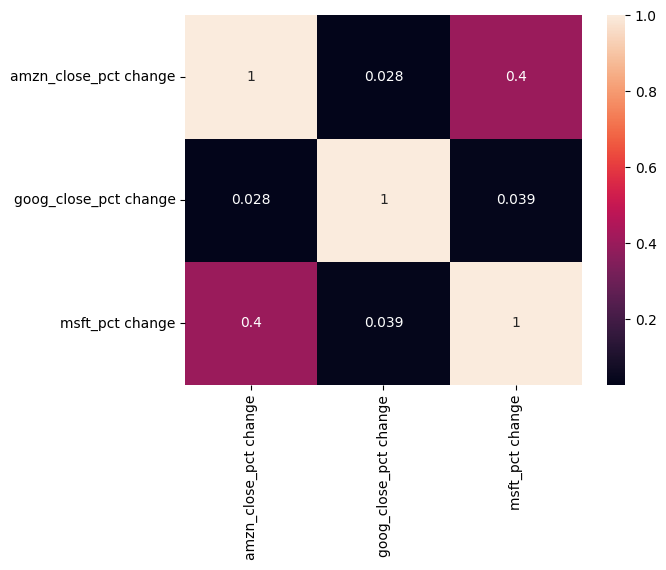

In [96]:
sns.heatmap(clsing_g.corr(), annot = True)